# Generating synthetic data

Synthetic data will be used mainly for these scenarios:

- Regression
- Classification

## Regression data

What does a regression consist of?

For this section we will mainly use `scikit-learn`'s [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) method.

For reproducibility, we will set a `random_state`.

In [1]:
random_state = 23

We will create a dataset using `make_regression`'s random linear regression model with input features $x=(f_1,f_2,f_3,f_4)$ and an output $y$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

N_FEATURES = 4
N_TARGETS = 1
N_SAMPLES = 100

dataset = make_regression(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=2,
    n_targets=N_TARGETS,
    bias=0.0,
    effective_rank=None,
    tail_strength=0.5,
    noise=0.0,
    shuffle=True,
    coef=False,
    random_state=random_state,
)

print(dataset[0][:10])
print(dataset[1][:10])

[[ 0.87305874 -1.63096187  0.52538404 -0.19035824]
 [ 1.00698671  0.79834941 -0.04057655 -0.31358605]
 [-0.61464273  1.65110321  0.75791487 -0.0039844 ]
 [-1.08536678  1.82337823  0.4612592  -1.72325306]
 [-1.67774847 -0.54401341  0.86347869 -0.30250463]
 [-0.02427254  0.75537599 -0.04644972 -0.85153564]
 [-0.48085576  0.82100952 -0.9390196  -0.25870492]
 [-0.66772841 -2.46244005 -0.19855095 -1.85756579]
 [-0.29810663 -0.02239635  0.25363492 -1.22688366]
 [ 1.48146924  0.38269965 -1.18208819 -1.31062148]]
[  20.00449025  -30.41054677   52.65371365 -119.26376184   33.78805456
  -78.12189078  -88.41673748 -177.21674804  -90.13920313 -197.90799195]


Let's turn this dataset into a Pandas `DataFrame`:

In [3]:
df = pd.DataFrame(data=dataset[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])

df["y"] = dataset[1]

In [4]:
df.head()

f1        f2        f3        f4           y
0  0.873059 -1.630962  0.525384 -0.190358   20.004490
1  1.006987  0.798349 -0.040577 -0.313586  -30.410547
2 -0.614643  1.651103  0.757915 -0.003984   52.653714
3 -1.085367  1.823378  0.461259 -1.723253 -119.263762
4 -1.677748 -0.544013  0.863479 -0.302505   33.788055

Let's plot the data:

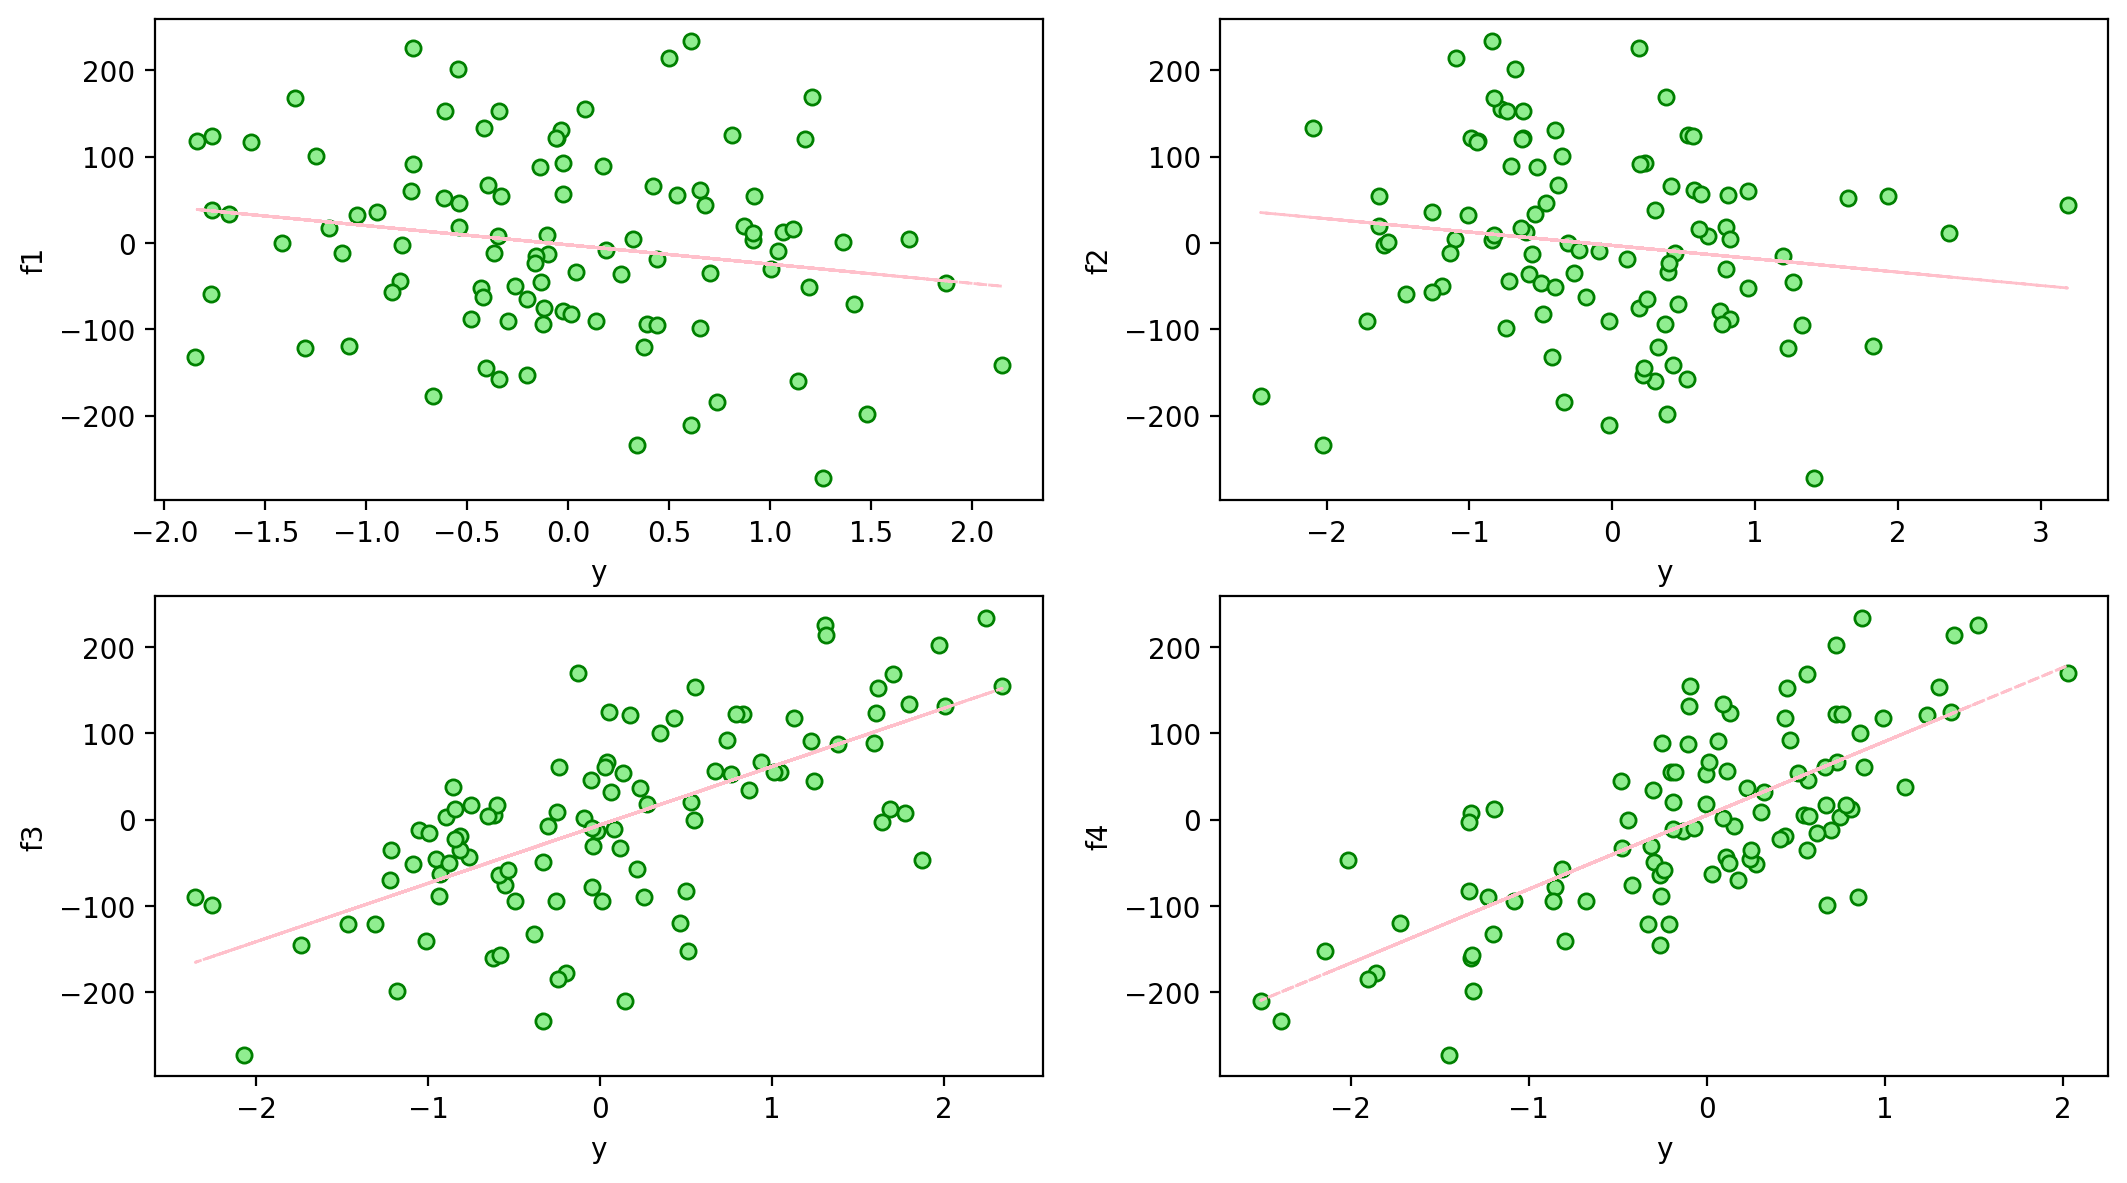

In [5]:
from plotutils import *


def plot_regression(df, size):
    for i in range(size):
        fit = np.polyfit(df[df.columns[i]], df["y"], 1)
        fit_fn = np.poly1d(fit)
        plt.subplot(2, 2, i + 1)
        plt.xlabel("y")
        plt.ylabel(f"f{i+1}")
        plt.scatter(df[df.columns[i]], df["y"], s=30, c=colours[1], edgecolor=edges[1])
        plt.plot(
            df[df.columns[i]], fit_fn(df[df.columns[i]]), ls="--", c=colours[0], lw=1
        )


plot_regression(df, N_FEATURES)

### Changing the Gaussian noise level

The `noise` parameter in `make_regression` allows to adjust the scale of the data's gaussian centered noise.

In [6]:
dataset = make_regression(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=2,
    n_targets=N_TARGETS,
    bias=0.0,
    effective_rank=None,
    tail_strength=0.5,
    noise=2.0,
    shuffle=True,
    coef=False,
    random_state=random_state,
)

df = pd.DataFrame(data=dataset[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])

df["y"] = dataset[1]

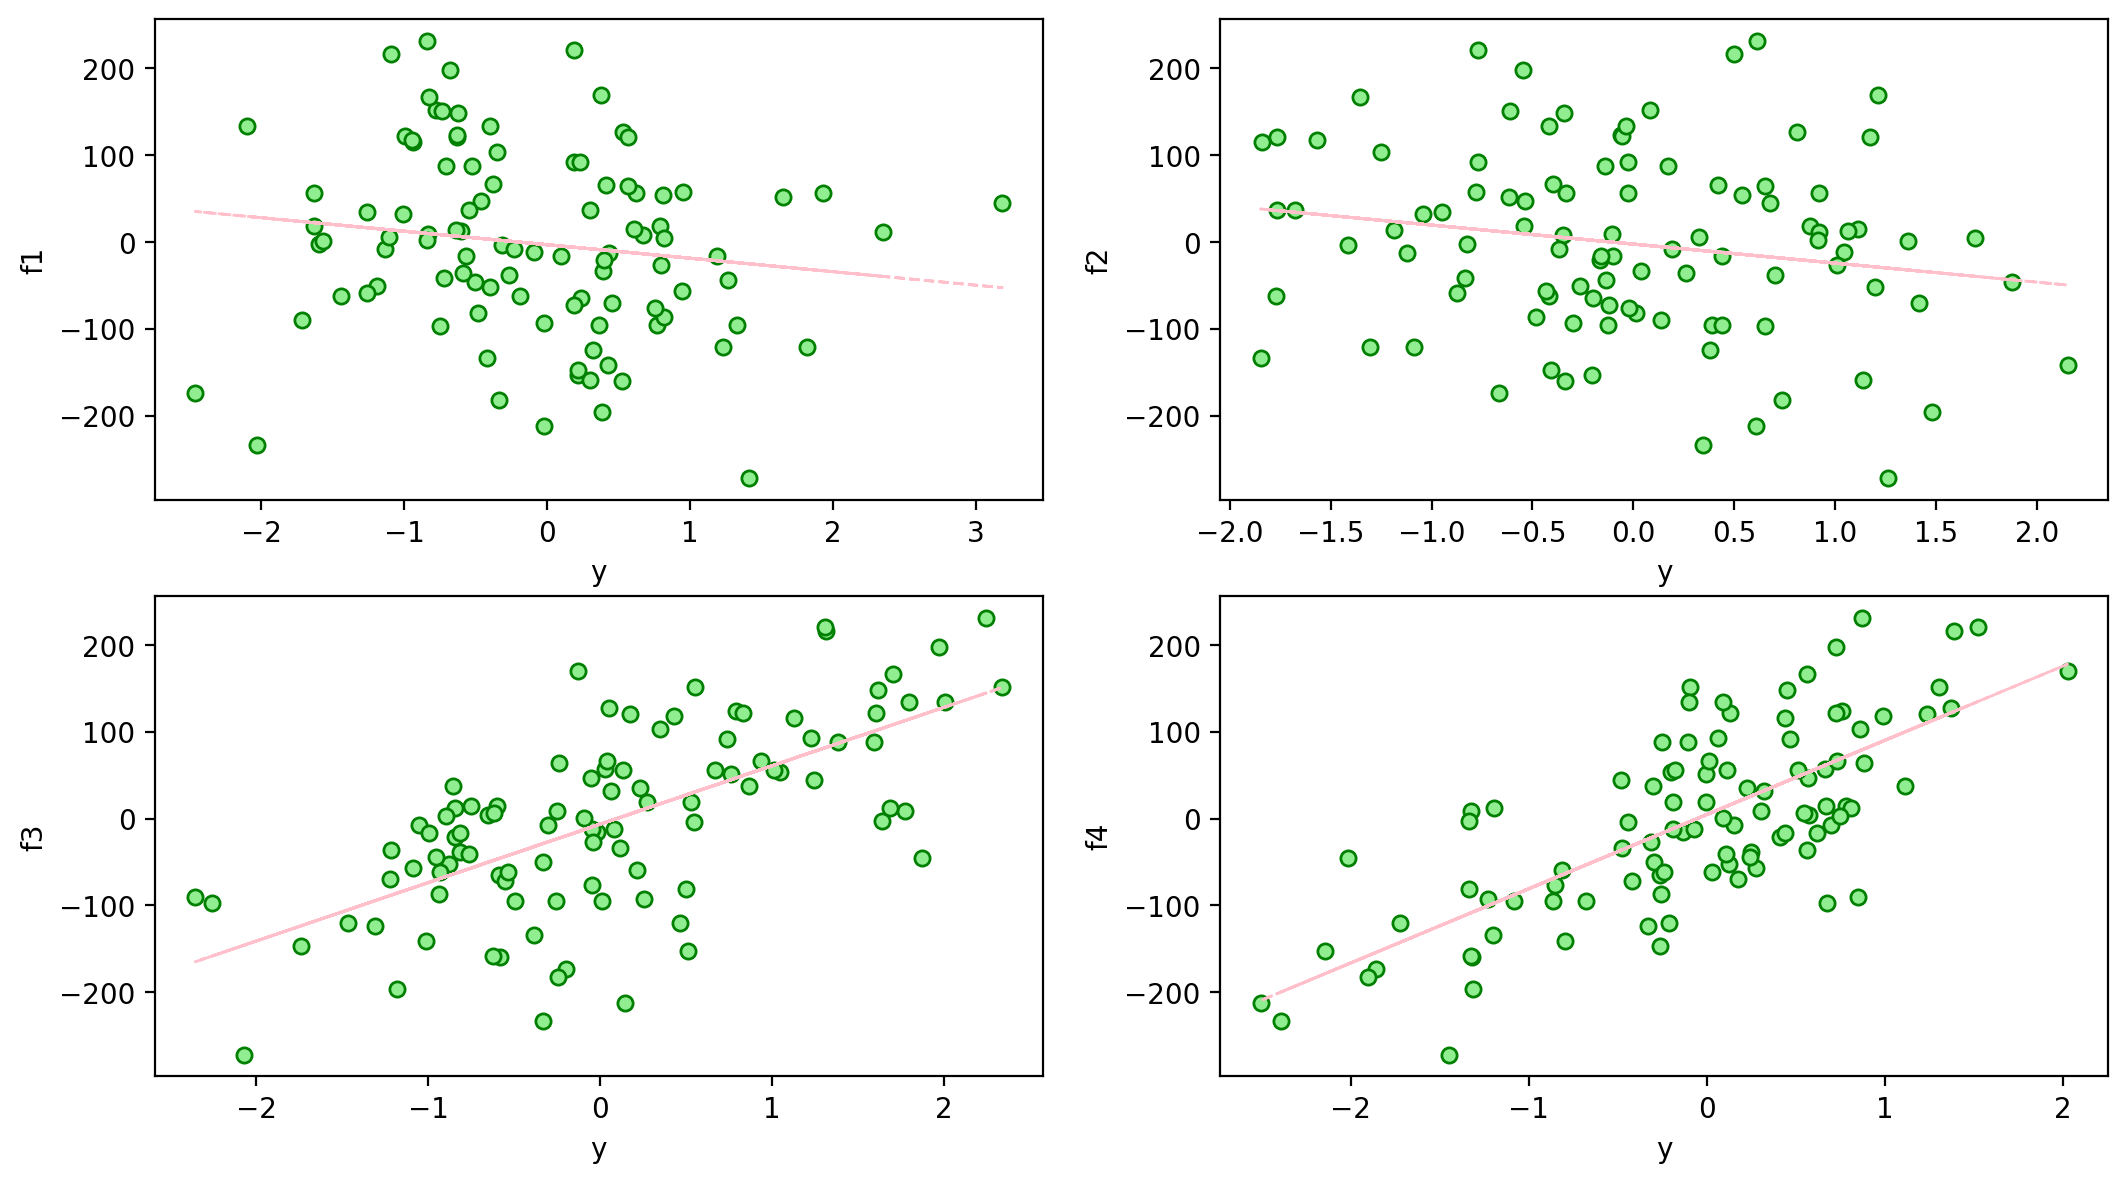

In [7]:
plot_regression(df, N_FEATURES)

### Visualising increasing noise

Let's increase the noise by $10^i$, for $i=1, 2, 3$ and see what the data looks like.

In [8]:
df = pd.DataFrame(data=np.zeros((N_SAMPLES, 1)))


def create_noisy_data(noise):
    return make_regression(
        n_samples=N_SAMPLES,
        n_features=1,
        n_informative=1,
        n_targets=1,
        bias=0.0,
        effective_rank=None,
        tail_strength=0.5,
        noise=noise,
        shuffle=True,
        coef=False,
        random_state=random_state,
    )


for i in range(3):
    data = create_noisy_data(10 ** i)

    df[f"f{i+1}"] = data[0]
    df[f"y{i+1}"] = data[1]

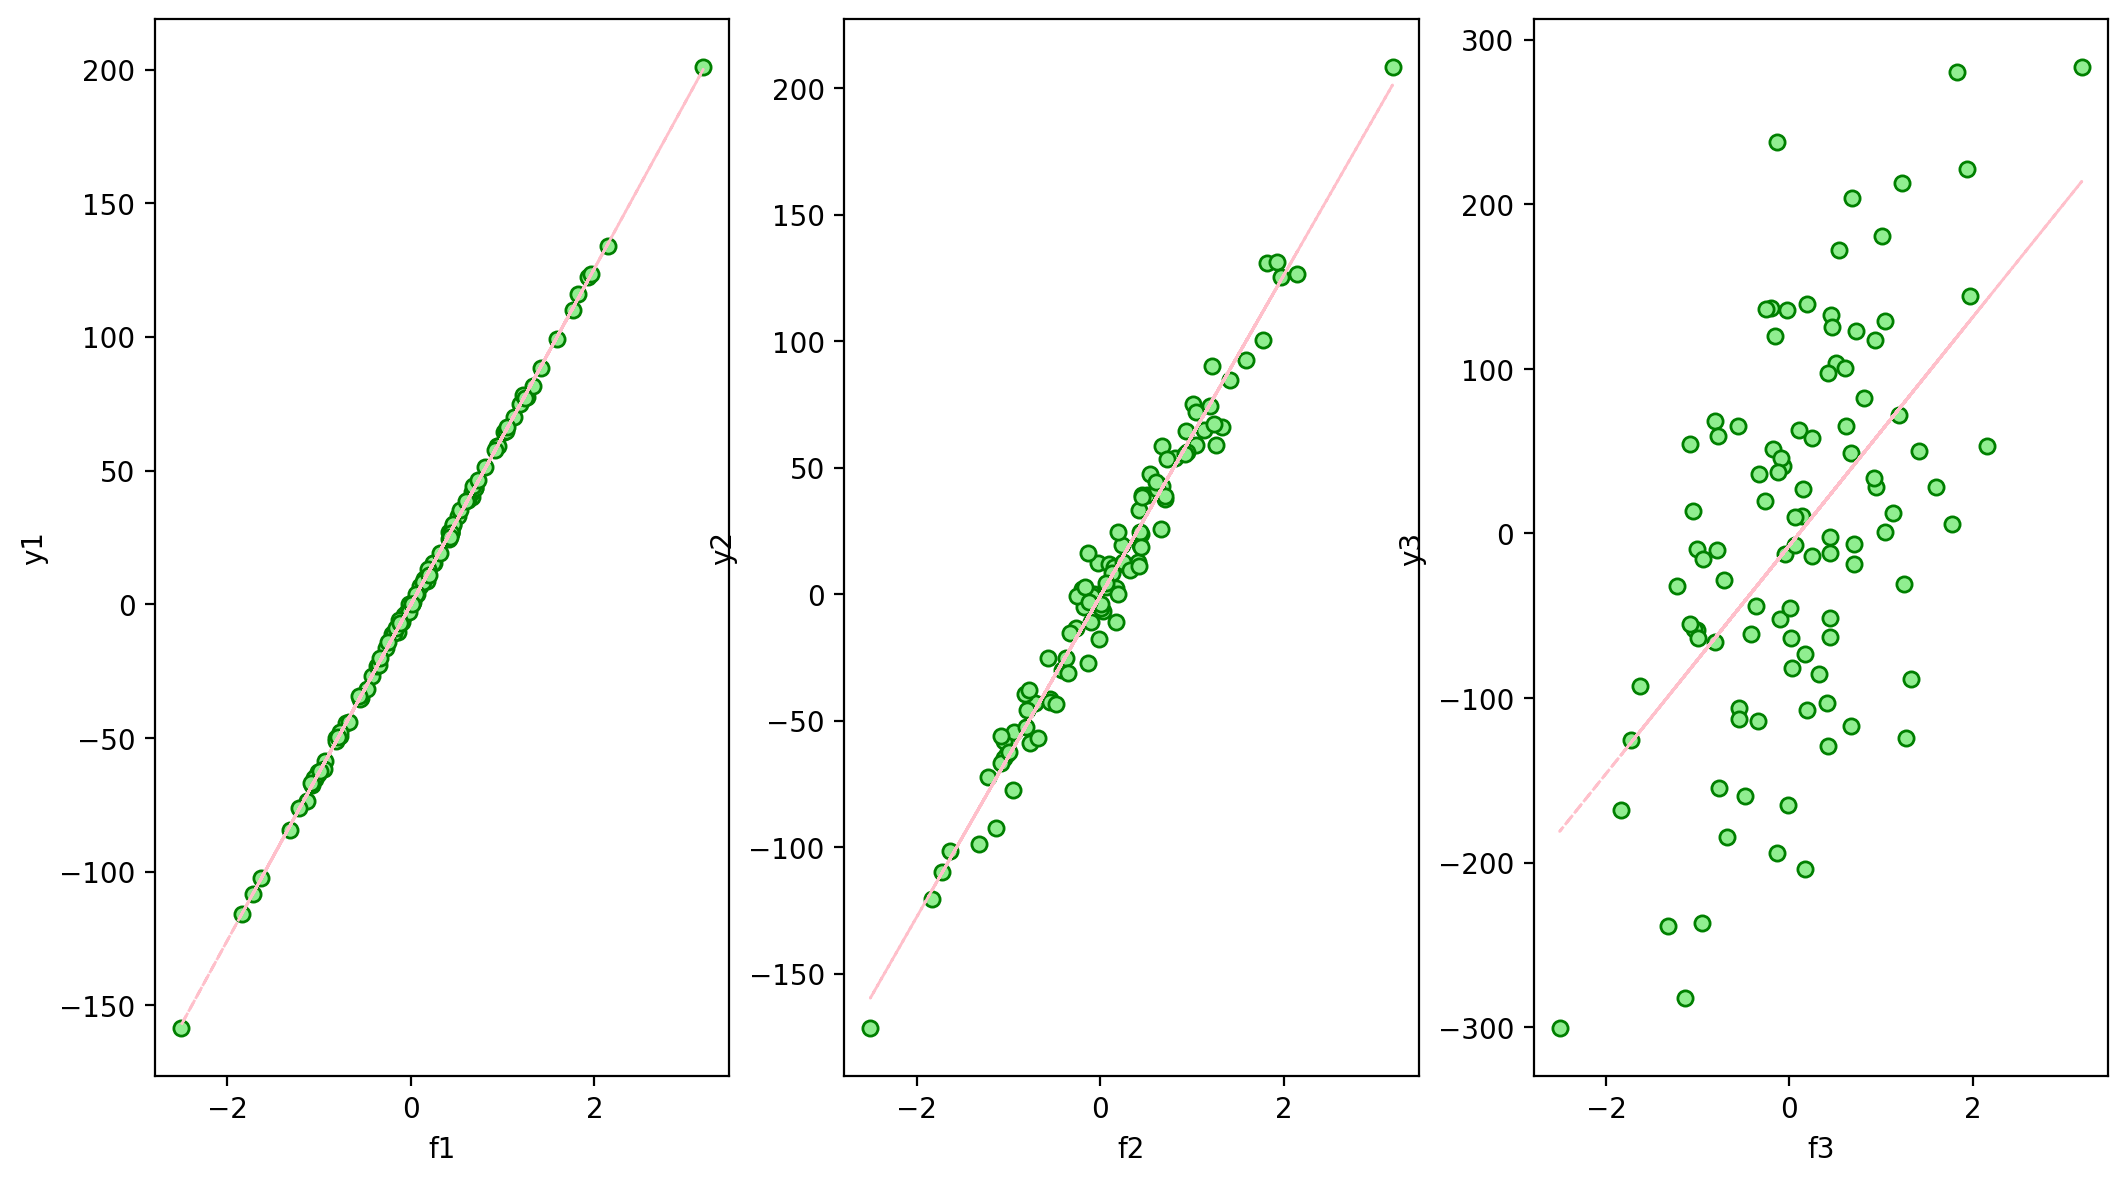

In [9]:
for i in range(3):
    fit = np.polyfit(df[f"f{i+1}"], df[f"y{i+1}"], 1)
    fit_fn = np.poly1d(fit)
    plt.subplot(1, 3, i + 1)
    plt.scatter(df[f"f{i+1}"], df[f"y{i+1}"], s=30, c=colours[1], edgecolor=edges[1])
    plt.plot(
        df[f"f{i+1}"],
        fit_fn(df[f"f{i+1}"]),
        ls="--",
        color=colours[0],
        lw=1,
    )
    plt.xlabel(f"f{i+1}")
    plt.ylabel(f"y{i+1}")

(data:classification)=
## Classification data

To generate data for classification we will use the [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) method.

In [10]:
from sklearn.datasets import make_classification

N = 4

data = make_classification(
    n_samples=N_SAMPLES,
    n_features=N,
    n_informative=4,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=random_state,
)

df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N)])

df["y"] = data[1]

In [11]:
df.head()

f1        f2        f3        f4  y
0 -3.216050 -0.416099 -1.295147 -1.882392  0
1 -1.425745 -1.257051 -1.734181 -1.804174  0
2  2.798452 -3.010355 -1.085003 -3.134384  1
3  0.632676  2.502098 -1.552652  1.625401  1
4  1.493905  0.911993 -1.887389 -1.457262  1

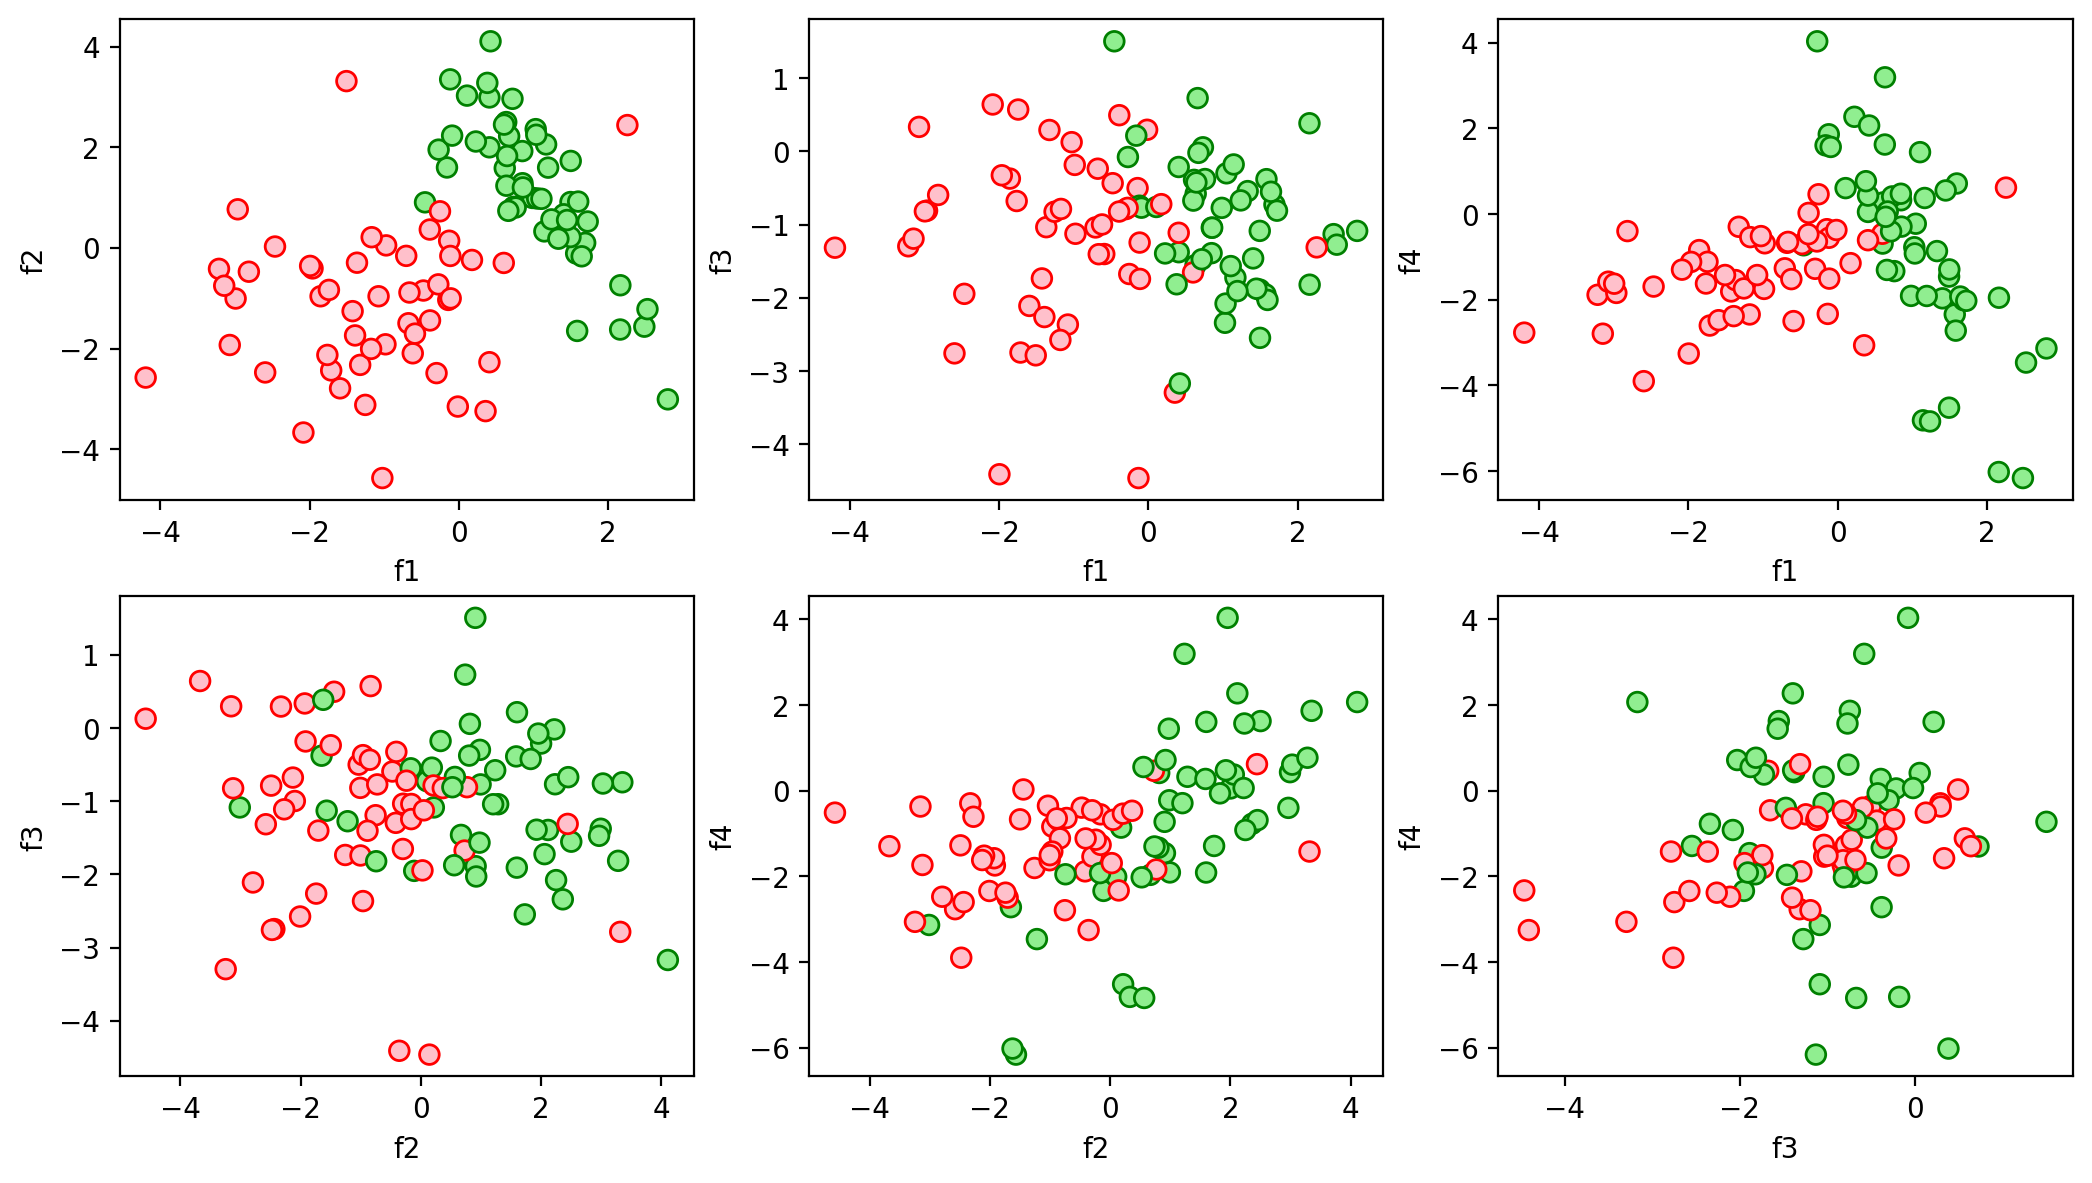

In [12]:
from itertools import combinations
from math import ceil

lst_var = list(combinations(df.columns[:-1], 2))
len_var = len(lst_var)

for i in range(1, len_var + 1):
    plt.subplot(2, ceil(len_var / 2), i)
    var1 = lst_var[i - 1][0]
    var2 = lst_var[i - 1][1]
    plt.scatter(
        df[var1],
        df[var2],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
    plt.xlabel(var1)
    plt.ylabel(var2)

### Cluster separation

According to the docs[^1], `class_sep` is the factor multiplying the hypercube size.

Larger values spread out the clusters/classes and make the classification task easier.

[^1]: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [13]:
N_FEATURES = 4

data = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=4,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.01,
    class_sep=3.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)

df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])

df["y"] = data[1]

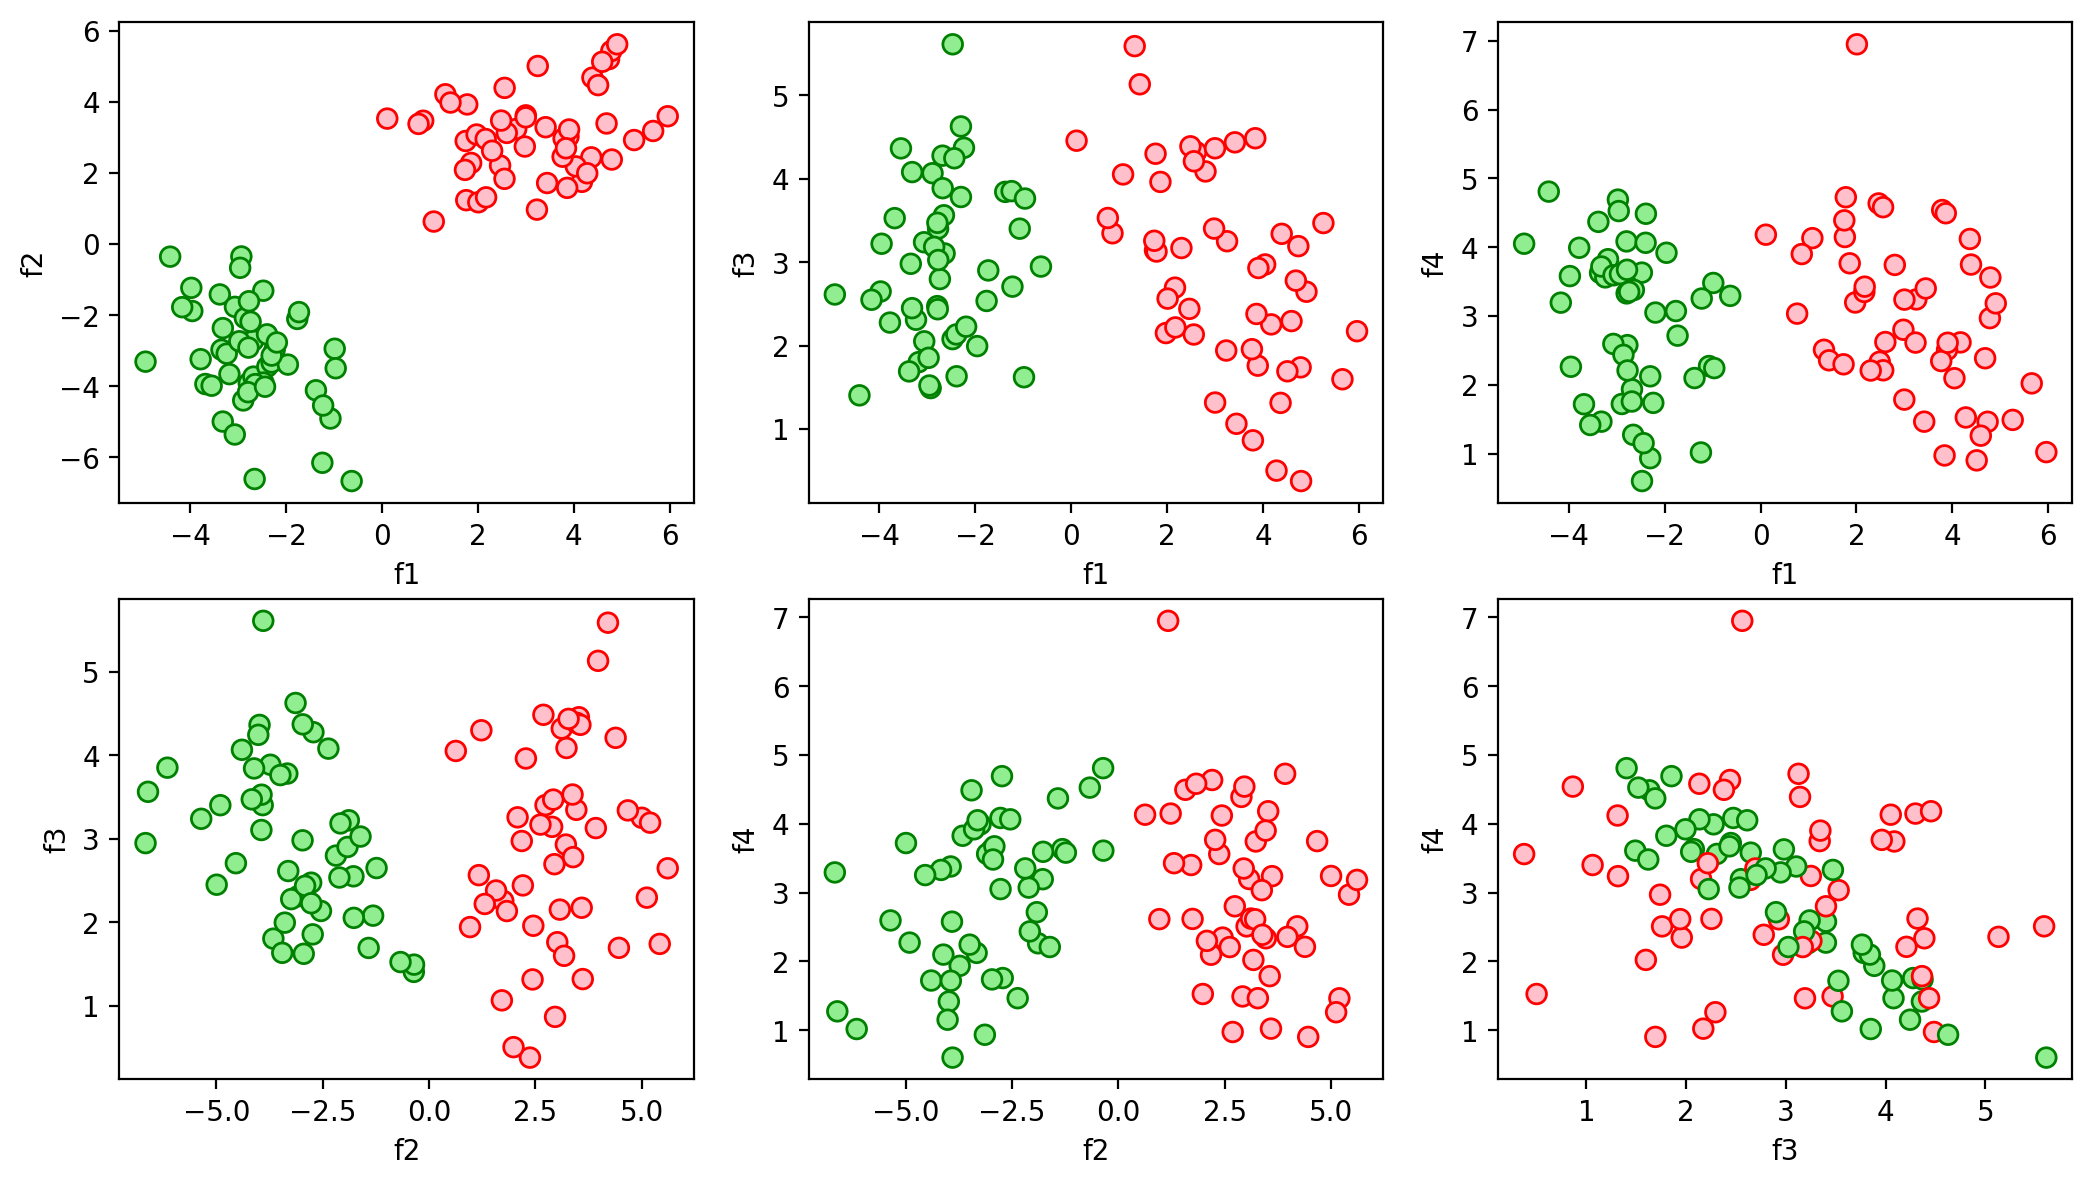

In [14]:
from itertools import combinations
from math import ceil

lst_var = list(combinations(df.columns[:-1], 2))
len_var = len(lst_var)

for i in range(1, len_var + 1):
    plt.subplot(2, ceil(len_var / 2), i)
    var1 = lst_var[i - 1][0]
    var2 = lst_var[i - 1][1]
    plt.scatter(
        df[var1],
        df[var2],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
    plt.xlabel(var1)
    plt.ylabel(var2)

We can make the cluster separability more difficult, by decreasing the value of `class_sep`.

In [15]:
N_FEATURES = 4

data = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=4,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.01,
    class_sep=0.5,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)

df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])

df["y"] = data[1]

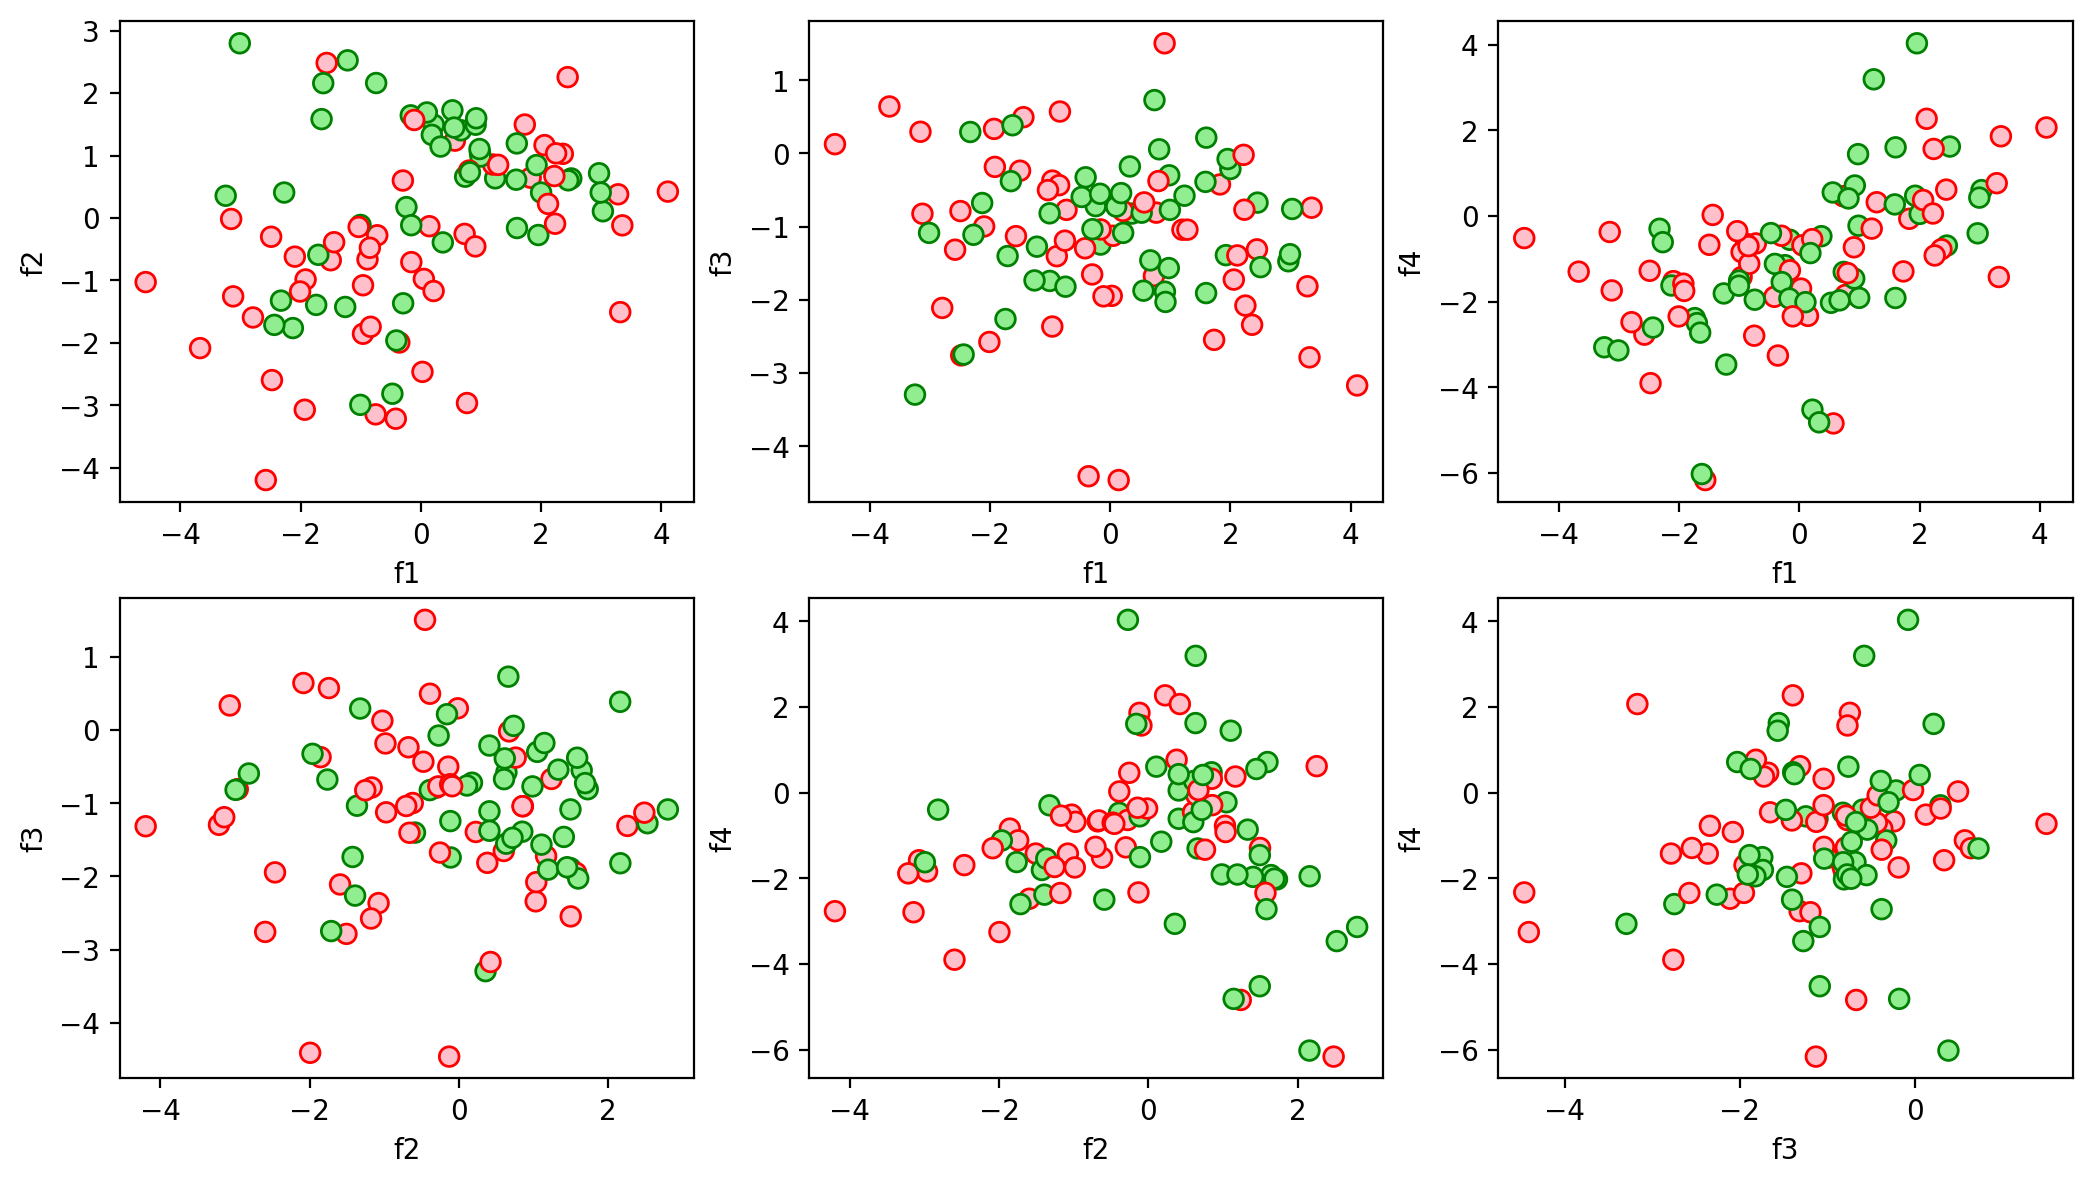

In [18]:
from itertools import combinations
from math import ceil

lst_var = list(combinations(df.columns[:-1], 2))
len_var = len(lst_var)

for i in range(1, len_var + 1):
    plt.subplot(2, ceil(len_var / 2), i)
    var1 = lst_var[i - 1][0]
    var2 = lst_var[i - 1][1]
    plt.scatter(
        df[var1],
        df[var2],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
    plt.xlabel(var1)
    plt.ylabel(var2)

### Noise level

According to the documentation[^1], `flip_y` is the fraction of samples whose class is assigned randomly.

Larger values introduce noise in the labels and make the classification task harder.

In [19]:
N_FEATURES = 4


for i in range(6):
    data = make_classification(
        n_samples=N_SAMPLES,
        n_features=N_FEATURES,
        n_informative=4,
        n_redundant=0,
        n_repeated=0,
        n_classes=2,
        n_clusters_per_class=1,
        weights=None,
        flip_y=0.1 * i,
        class_sep=1.0,
        hypercube=True,
        shift=0.0,
        scale=1.0,
        shuffle=False,
        random_state=random_state,
    )
    df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])
    df["y"] = data[1]
    plt.subplot(2, 3, i + 1)
    plt.title(f"Plot for flip_y={round(0.1*i,2)}")
    plt.scatter(
        df["f1"],
        df["f2"],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
plt.tight_layout(pad=3.0)

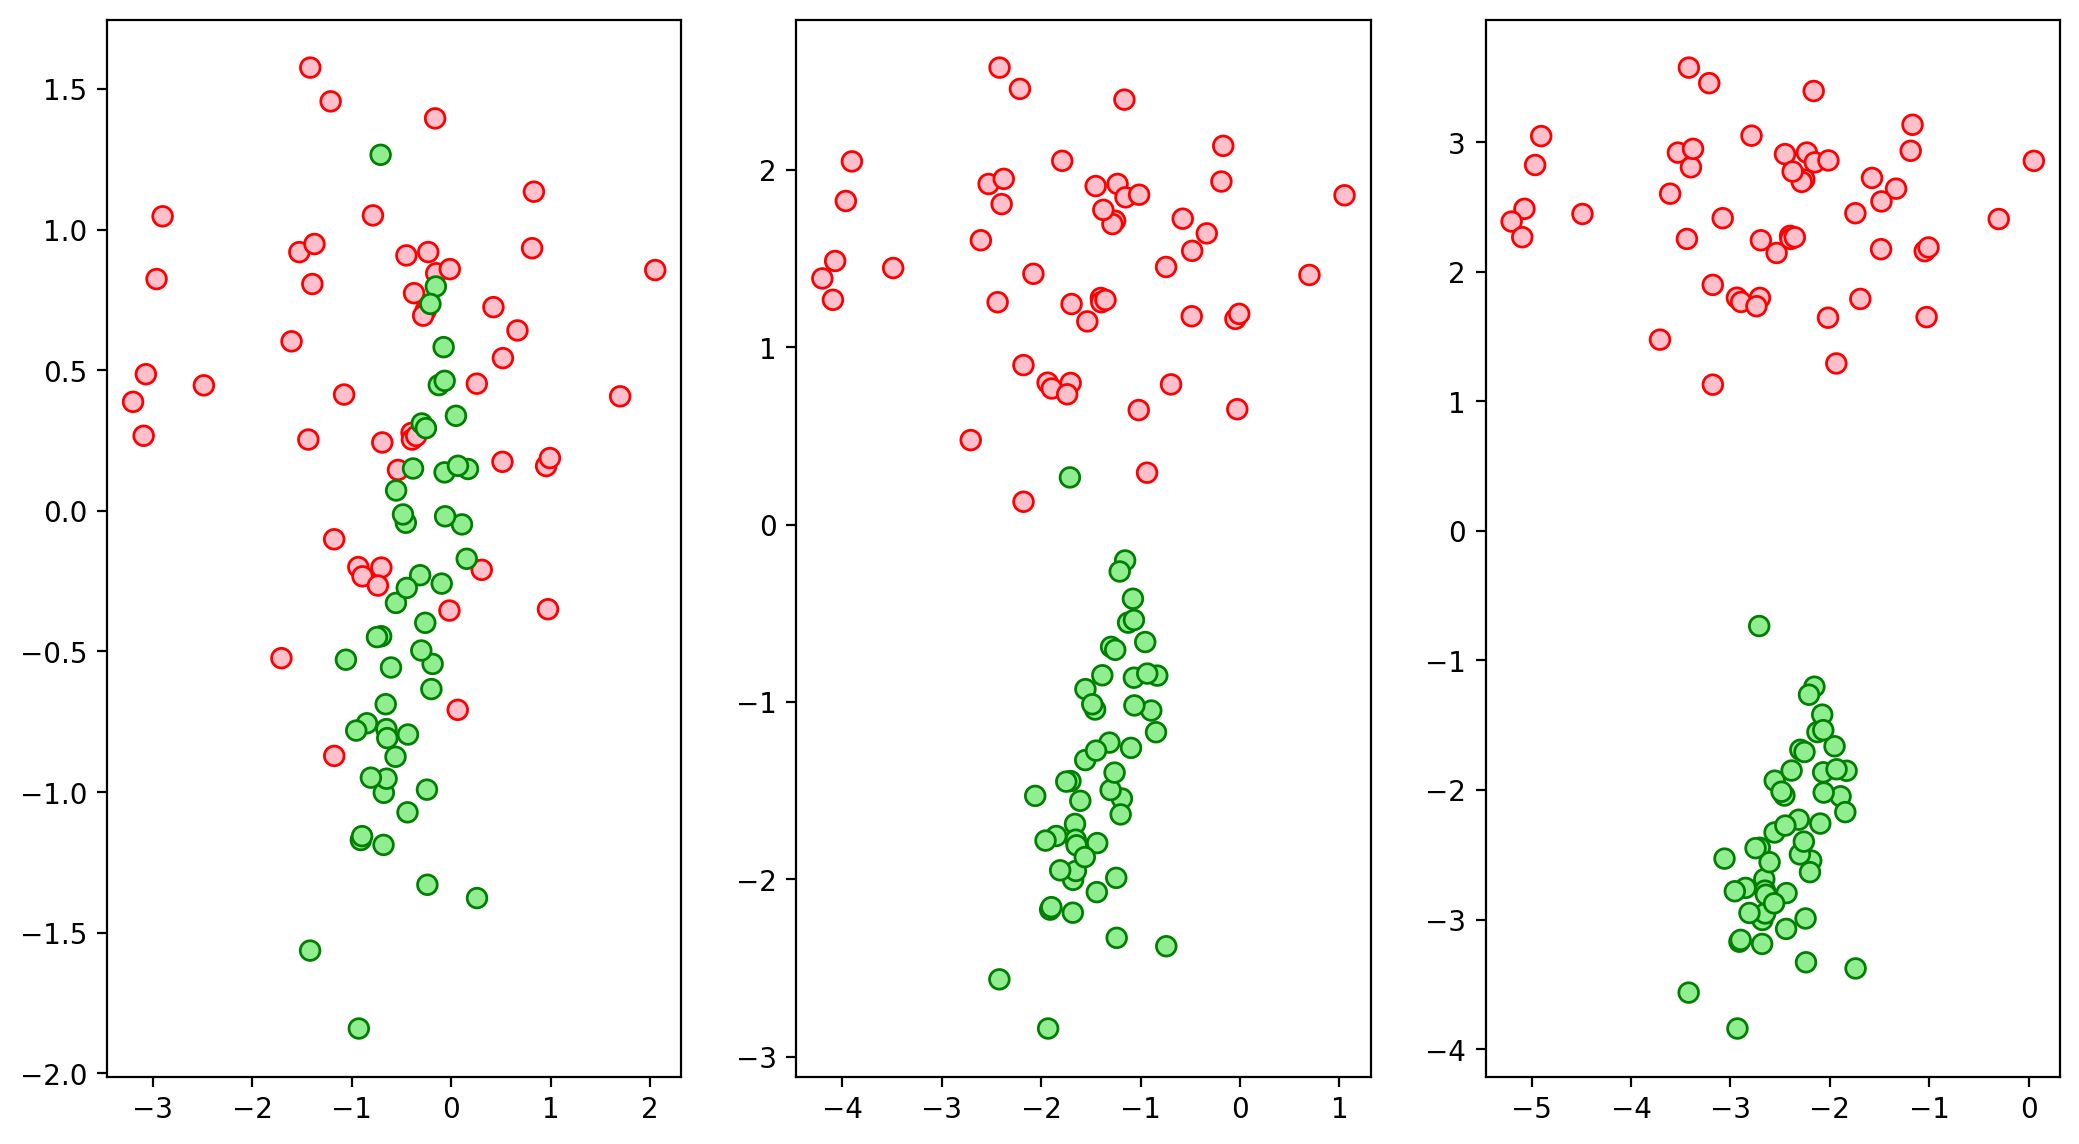

In [20]:
df = pd.DataFrame(data=np.zeros((N_SAMPLES, 1)))

for i in range(3):
    data = make_classification(
        n_samples=N_SAMPLES,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=2,
        n_clusters_per_class=1,
        weights=None,
        flip_y=0,
        class_sep=i + 0.5,
        hypercube=True,
        shift=0.0,
        scale=1.0,
        shuffle=False,
        random_state=random_state,
    )
    df[f"f{i+1}1"] = data[0][:, 0]
    df[f"f{i+1}2"] = data[0][:, 1]
    df[f"t{i+1}"] = data[1]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(
        df[f"f{i+1}1"],
        df[f"f{i+1}2"],
        s=50,
        c=df[f"t{i+1}"].apply(lambda y: colours[y]),
        edgecolor=df[f"t{i+1}"].apply(lambda y: edges[y]),
    )

## Separability

In [21]:
from sklearn.datasets import make_blobs

N_FEATURE = 4

data = make_blobs(
    n_samples=60,
    n_features=N_FEATURE,
    centers=3,
    cluster_std=1.0,
    center_box=(-5.0, 5.0),
    shuffle=True,
    random_state=None,
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N_FEATURE)])
df["y"] = data[1]

In [22]:
from itertools import combinations
from math import ceil

lst_var = list(combinations(df.columns[:-1], 2))
len_var = len(lst_var)
for i in range(1, len_var + 1):
    plt.subplot(2, ceil(len_var / 2), i)
    var1 = lst_var[i - 1][0]
    var2 = lst_var[i - 1][1]
    plt.scatter(
        df[var1],
        df[var2],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
    plt.xlabel(var1)
    plt.ylabel(var2)

To make a cluster more separable we can change `cluster_std`.

In [23]:
data = make_blobs(
    n_samples=60,
    n_features=N_FEATURES,
    centers=3,
    cluster_std=0.3,
    center_box=(-5.0, 5.0),
    shuffle=True,
    random_state=None,
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])
df["y"] = data[1]

In [24]:
from itertools import combinations
from math import ceil

lst_var = list(combinations(df.columns[:-1], 2))
len_var = len(lst_var)
for i in range(1, len_var + 1):
    plt.subplot(2, ceil(len_var / 2), i)
    var1 = lst_var[i - 1][0]
    var2 = lst_var[i - 1][1]
    plt.scatter(
        df[var1],
        df[var2],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
    plt.xlabel(var1)
    plt.ylabel(var2)

By decreasing `cluster_std` we make them less separable.

In [25]:
data = make_blobs(
    n_samples=60,
    n_features=N_FEATURES,
    centers=3,
    cluster_std=2.5,
    center_box=(-5.0, 5.0),
    shuffle=True,
    random_state=None,
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(N_FEATURES)])
df["y"] = data[1]

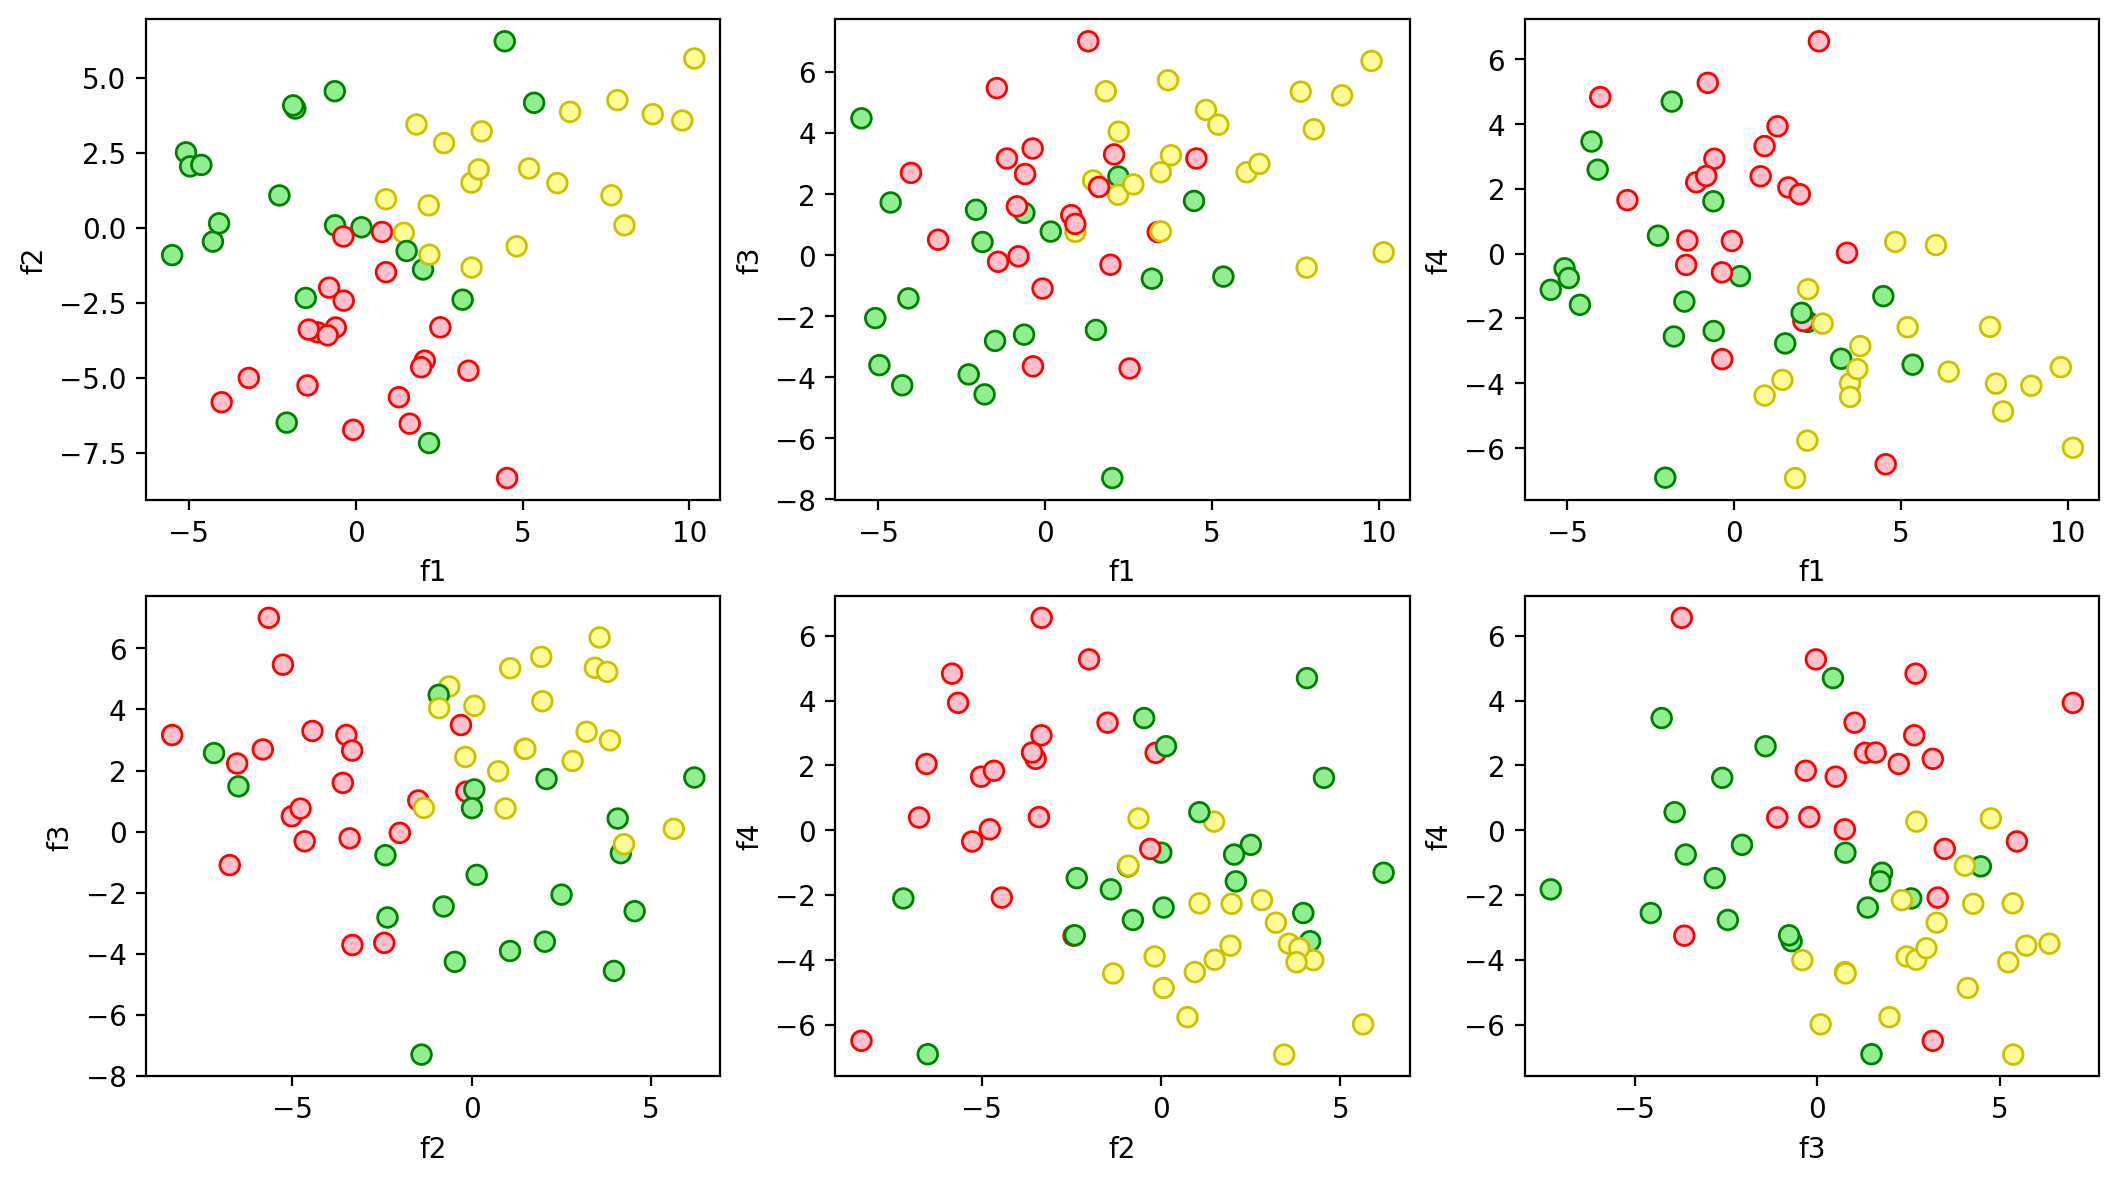

In [26]:
from itertools import combinations
from math import ceil

lst_var = list(combinations(df.columns[:-1], 2))
len_var = len(lst_var)
for i in range(1, len_var + 1):
    plt.subplot(2, ceil(len_var / 2), i)
    var1 = lst_var[i - 1][0]
    var2 = lst_var[i - 1][1]
    plt.scatter(
        df[var1],
        df[var2],
        s=50,
        c=df["y"].apply(lambda y: colours[y]),
        edgecolor=df["y"].apply(lambda y: edges[y]),
    )
    plt.xlabel(var1)
    plt.ylabel(var2)

### Anisotropic data

In [27]:
data = make_blobs(n_samples=50, n_features=2, centers=3, cluster_std=1.5)

In [28]:
transformation = [[0.5, -0.5], [-0.4, 0.8]]

In [29]:
data_0 = np.dot(data[0], transformation)
df = pd.DataFrame(data_0, columns=[f"f{i}" for i in range(1, 3)])
df["y"] = data[1]

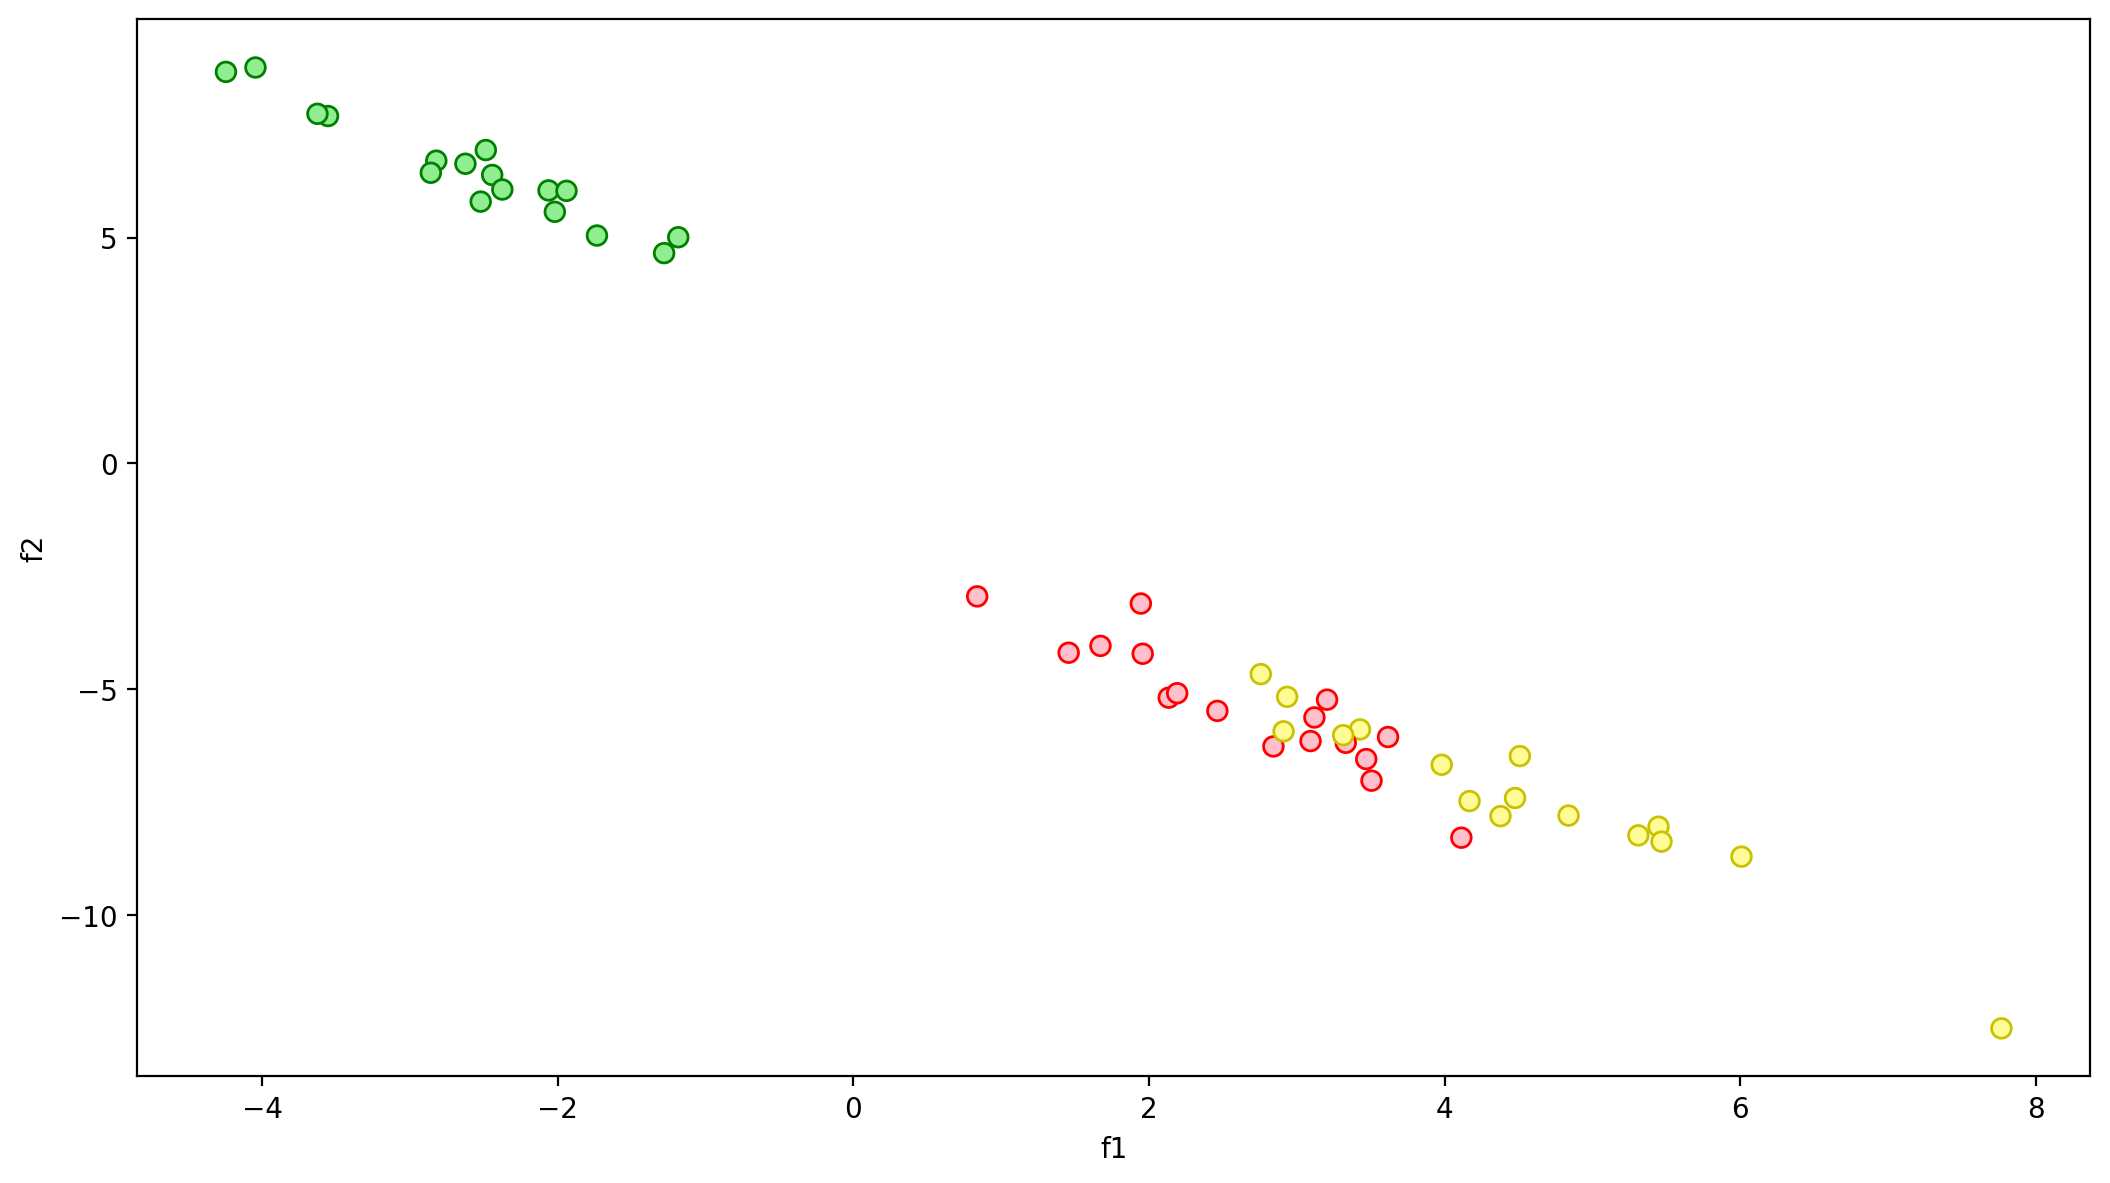

In [30]:
plt.scatter(
    df["f1"],
    df["f2"],
    c=df["y"].apply(lambda y: colours[y]),
    s=50,
    edgecolors=df["y"].apply(lambda y: edges[y]),
)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()

## Concentric clusters

Sometimes we might be interested in creating a non-separable cluster.

The simples way is to create concentric clusters with the `make_circles` method.

In [31]:
from sklearn.datasets import make_circles

data = make_circles(
    n_samples=N_SAMPLES, shuffle=True, noise=None, random_state=random_state, factor=0.6
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(2)])
df["y"] = data[1]

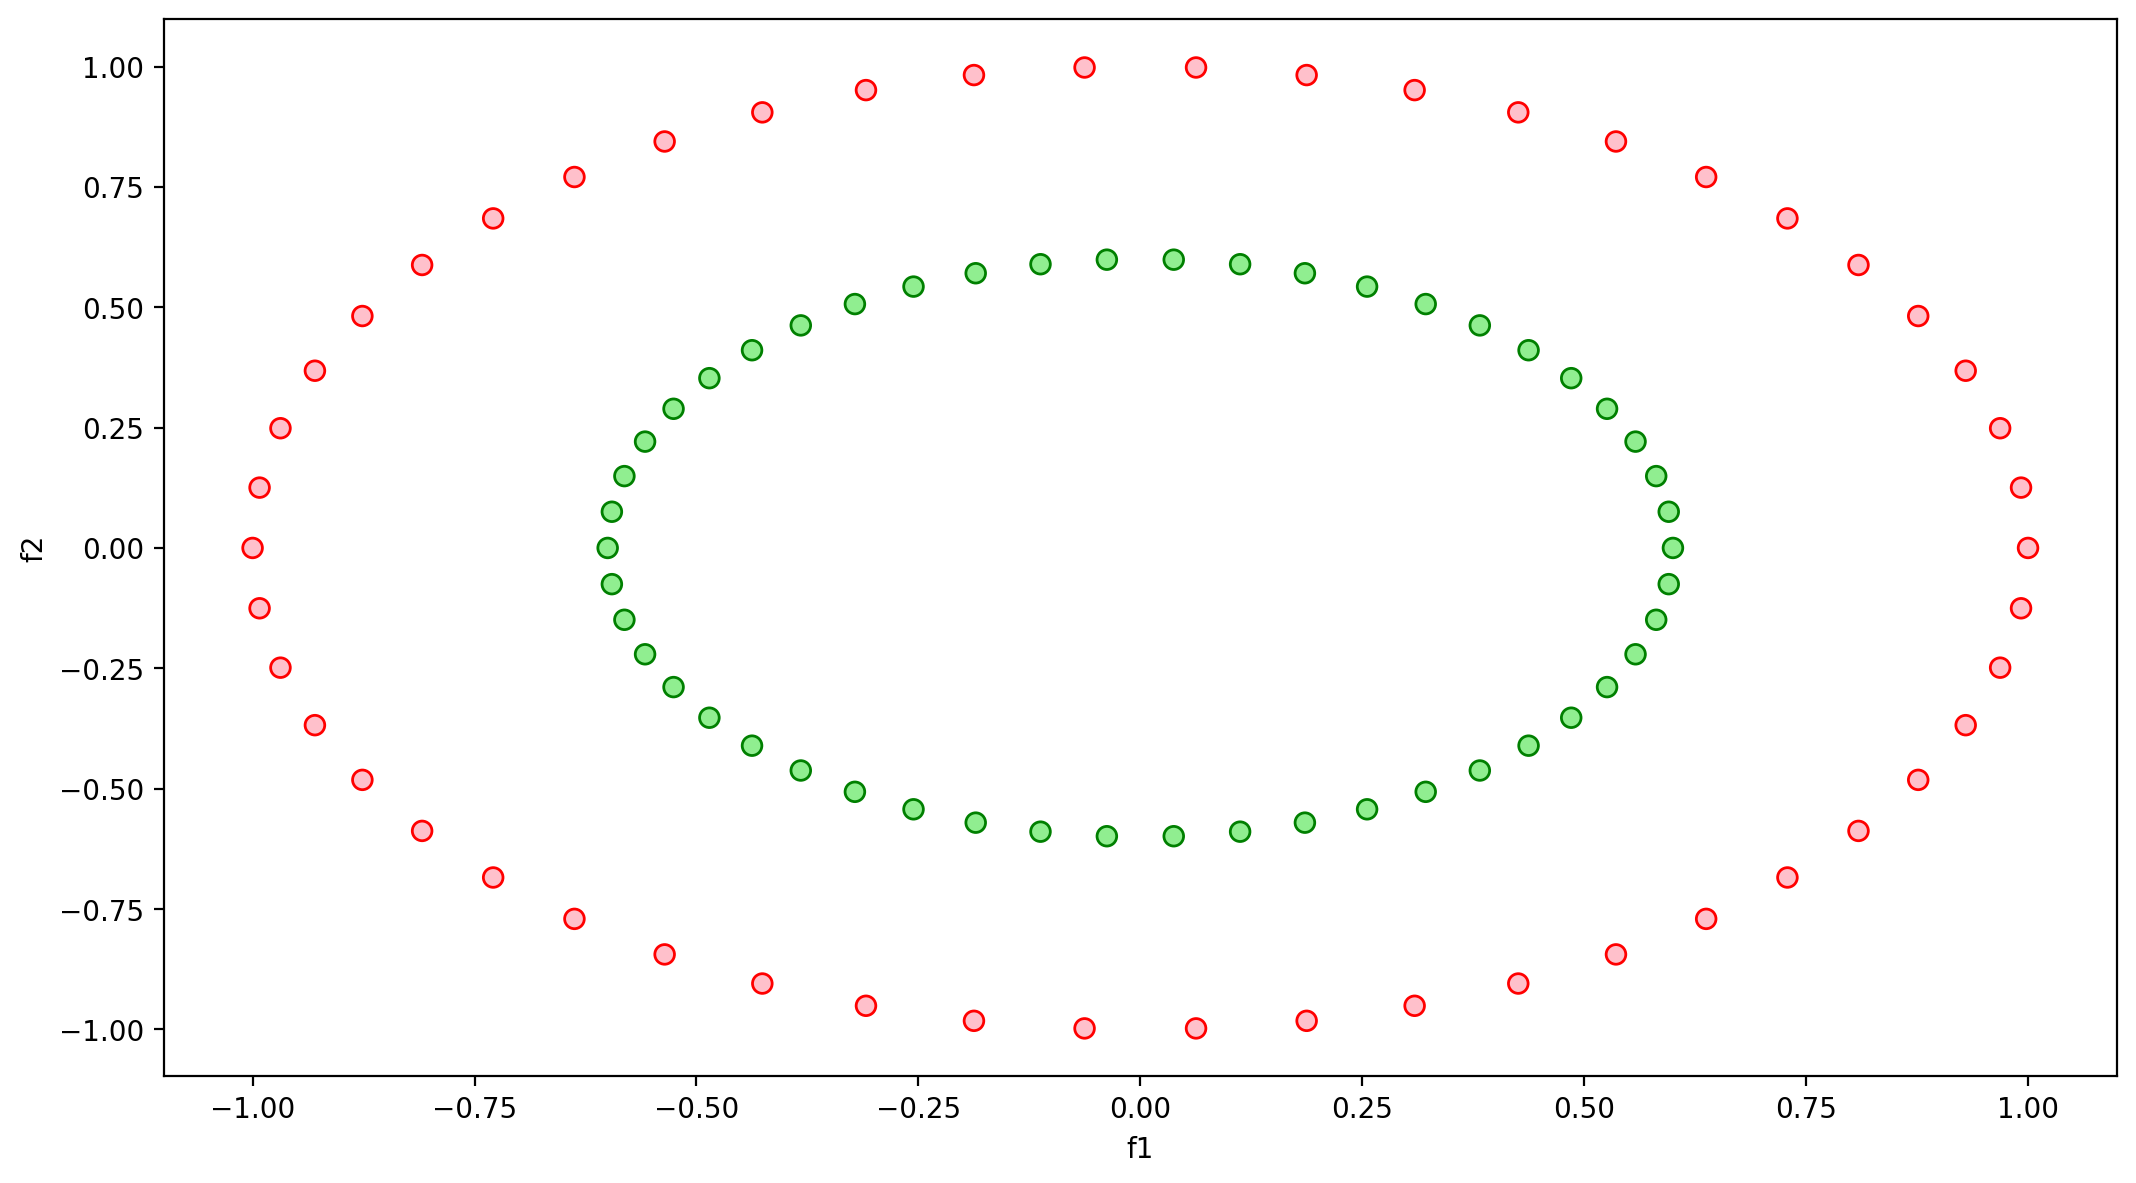

In [32]:
plt.scatter(
    df["f1"],
    df["f2"],
    c=df["y"].apply(lambda y: colours[y]),
    s=50,
    edgecolors=df["y"].apply(lambda y: edges[y]),
)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()

### Adding noise

The `noise` parameter allows to create a concentric noisy dataset.

In [33]:
data = make_circles(
    n_samples=N_SAMPLES, shuffle=True, noise=0.15, random_state=random_state, factor=0.6
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(2)])
df["y"] = data[1]

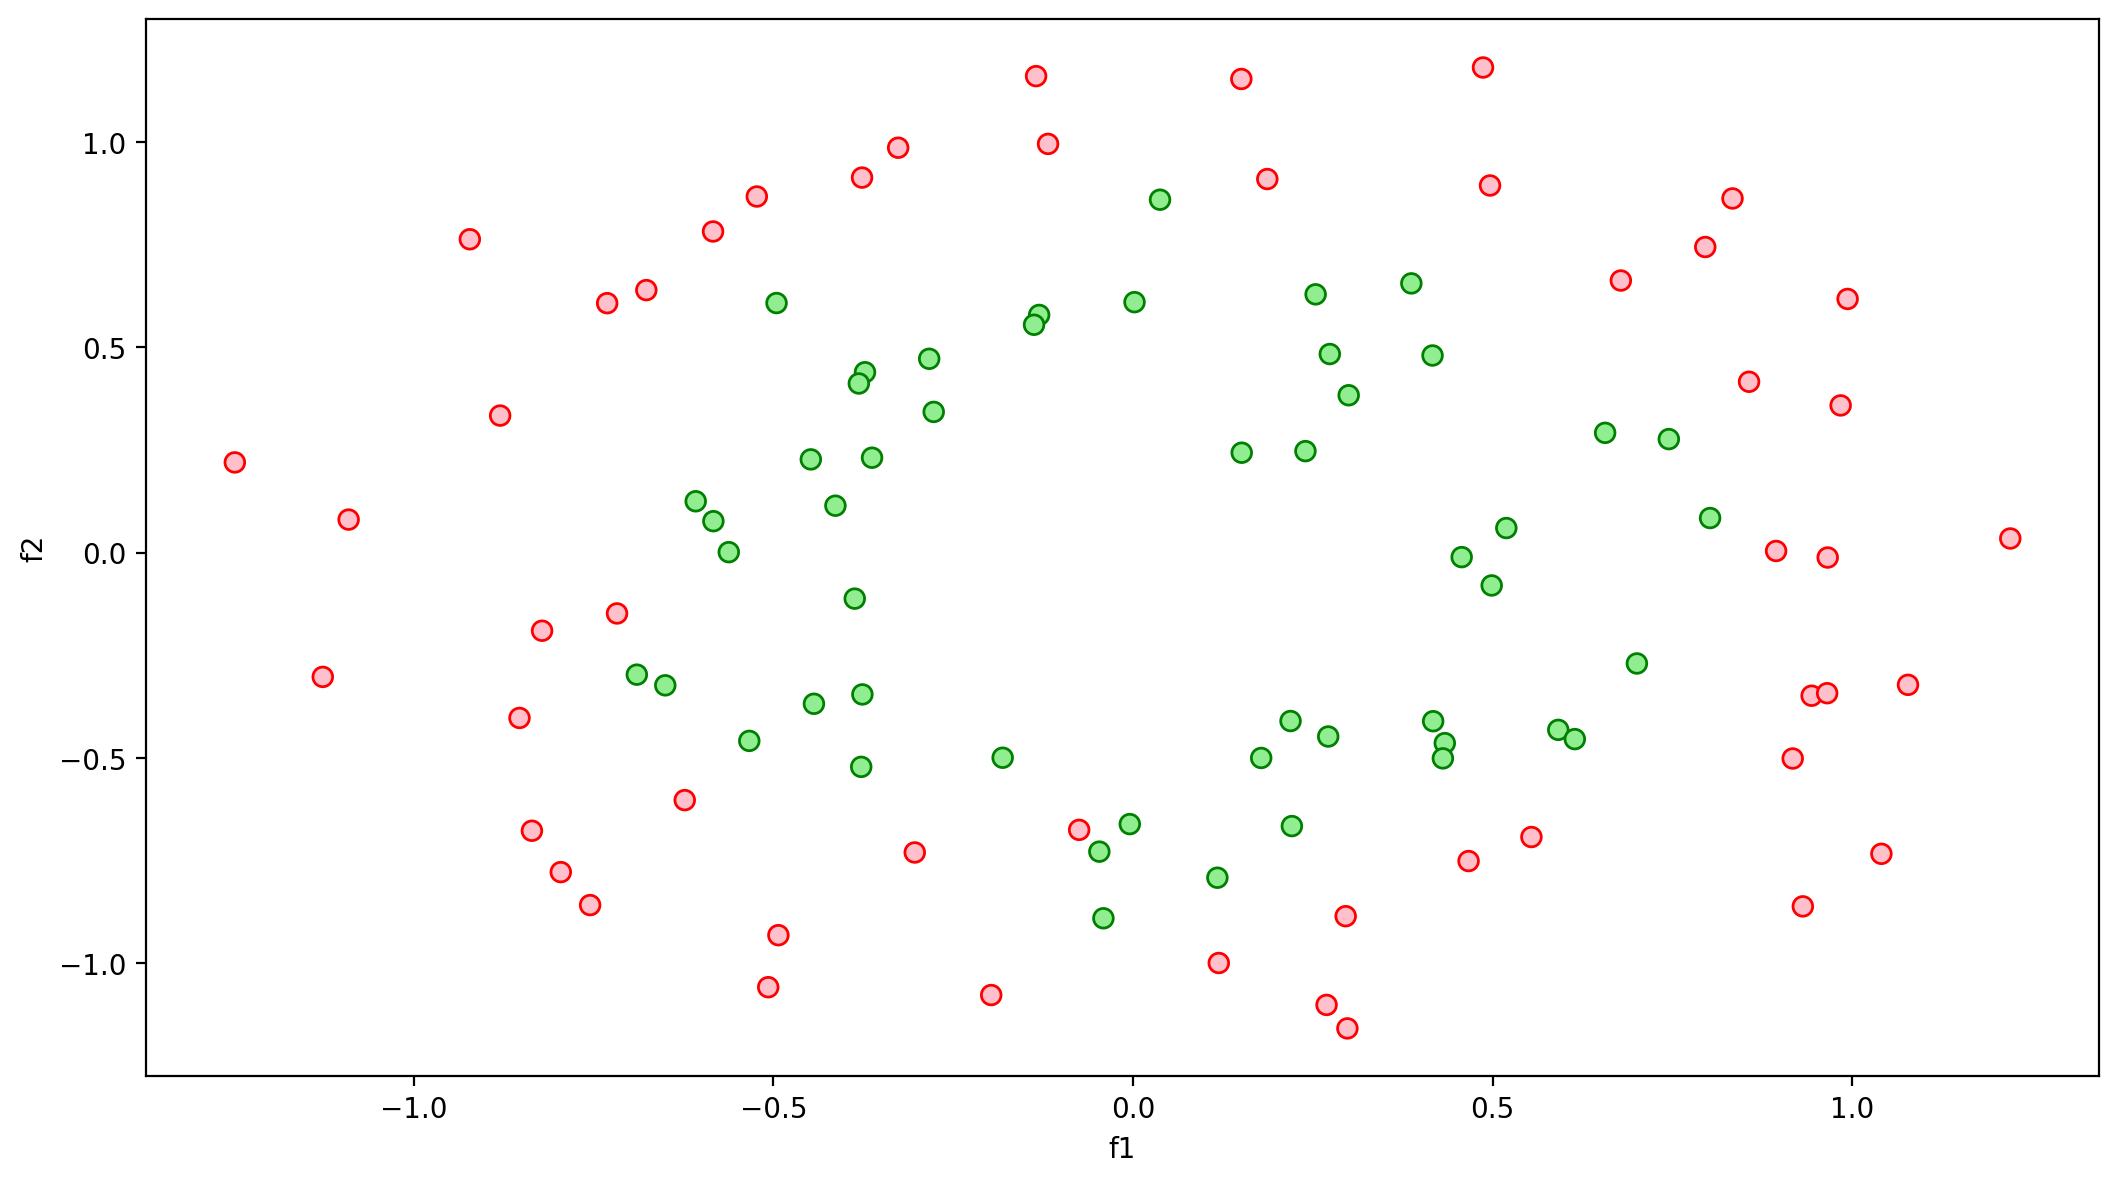

In [34]:
plt.scatter(
    df["f1"],
    df["f2"],
    c=df["y"].apply(lambda y: colours[y]),
    s=50,
    edgecolors=df["y"].apply(lambda y: edges[y]),
)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()

## Moon clusters

A shape that can be useful to other methos (such as counterfactuals, for instance) is the `make_moons` method.

In [35]:
from sklearn.datasets import make_moons

data = make_moons(
    n_samples=N_SAMPLES, shuffle=True, noise=None, random_state=random_state
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(2)])
df["y"] = data[1]

In [36]:
plt.scatter(
    df["f1"],
    df["f2"],
    c=df["y"].apply(lambda y: colours[y]),
    s=50,
    edgecolors=df["y"].apply(lambda y: edges[y]),
)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()

### Adding noise

As usual, the `noise` parameter allows to control the noise.

In [37]:
data = make_moons(
    n_samples=N_SAMPLES, shuffle=True, noise=0.1, random_state=random_state
)
df = pd.DataFrame(data[0], columns=[f"f{i+1}" for i in range(2)])
df["y"] = data[1]

In [38]:
plt.scatter(
    df["f1"],
    df["f2"],
    c=df["y"].apply(lambda y: colours[y]),
    s=50,
    edgecolors=df["y"].apply(lambda y: edges[y]),
)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()